In [6]:
import numpy as np
import pandas as pd
import glob
import os
from odf import text, teletype
from odf.opendocument import load

# Get current working directory
cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))


Current working directory: c:\Users\mobil\OneDrive\Desktop\FRA532_Exam\src


## Function

In [7]:
def calculate_subtraction(column):
    # Split each entry by the '-' delimiter
    split_values = column.str.split('-', expand=True)
    # Convert the resulting substrings into numbers
    num1 = pd.to_numeric(split_values[0])
    num2 = pd.to_numeric(split_values[1])
    # Calculate the difference between the two numbers
    result = num1 - num2
    return result

In [8]:
# Path to your ODS file
ods_file_path = cwd + '/expresult.ods'

# Load the ODS file
doc = load(ods_file_path)

# Extract text from the ODS file
content = []
for text_node in doc.getElementsByType(text.P):
    content.append(teletype.extractText(text_node))

# # Print the extracted content
# for line in content:
#     print(line)


default
0.025
0.02
x
y
cov
0.025
cov
0.005
cov
0.045
1
201.4
25.7-20
x
y
2
201
20-14.1
1
201.6
20-17.2
1
201.9
20-9.2
1
202.3
20-10.7
3
201.4
22.2-20
2
202
27.3-20
2
201.1
25.7-20
2
201.4
29.4-20
4
201.5
20-9.9
3
201.6
20-14.3
3
202.8
20-13.4
3
201.7
20-15.4
5
200.9
33.4-20
4
202.3
25.5-20
4
201.9
26.7-20
4
202
27.5-20
6
201.3
20-10.9
5
200.5
20-17.1
5
202.4
20-15.1
5
201.9
20-18.7
7
200.4
29.2-20
6
201.4
31.8-20
6
201.5
29.4-20
6
201.9
29.3-20
8
201.2
20-7.6
7
201.7
20-13
7
201.2
20-11.7
7
201.6
20-11.1
9
199.8
36.9-20
8
202
27.9-20
8
201.2
28.5-20
8
201.1
27.8-20
10
200.9
20-10.8
9
201.4
20-11.4
9
202
20-7.2
9
201.5
20-16.5
11
201.6
20-10.2
10
201.9
29-20
10
202.4
25.8-20
10
201.8
20-17.1
12
201.7
27.4-20
13
202
20-5.2
14
201.2
28.8-20
15
201.6
20-8.6
16
201.6
31.1-20
17
201.9
20-17.2
18
201.6
33.6-20
19
202.4
20-10.5
20
201
20-17.0
21
201.7
25-20
22
201.5
20-16.9
23
200.3
20-13.1
24
201.8
33.3-20
25
202
20-19.4
26
201.4
20-13.0
27
202.4
26.7-20
28
200.3
20-12.9
29
201.5
23.8-20
30
2

## x เเละ y ที่หุ่นยนต์เดินได้

In [9]:
x_y_robot_ground_truth_csv = '/expresult.csv'

x_y_robot_ground_truth_list = []
x_y_robot_ground_truth_data = pd.read_csv(x_y_robot_ground_truth_csv, index_col=False)
x_y_robot_ground_truth_list.append(x_y_robot_ground_truth_data)
x_y_robot_ground_truth = pd.concat(x_y_robot_ground_truth_list, ignore_index=True)

x_y_robot_ground_truth.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 14: invalid start byte

### x เเละ y เมื่อทำการปรับค่า cov เป็น 0.005 , 0.025 เเละ 0.045

In [ ]:
x_y_robot_cov5 = x_y_robot_ground_truth.iloc[4:14, 9:11].rename(columns={'Unnamed: 9':'x_cov5', 'Unnamed: 10':'raw_y_cov5'})
x_y_robot_cov25 = x_y_robot_ground_truth.iloc[4:14, 6:8].rename(columns={'Unnamed: 6':'x_cov25', 'Unnamed: 7':'raw_y_cov25'})
x_y_robot_cov45 = x_y_robot_ground_truth.iloc[4:14, 12:].rename(columns={'Unnamed: 12':'x_cov45', 'Unnamed: 13':'raw_y_cov45'})

x_y_robot_cov5['y_cov5'] = calculate_subtraction(x_y_robot_cov5['raw_y_cov5'])
x_y_robot_cov25['y_cov25'] = calculate_subtraction(x_y_robot_cov25['raw_y_cov25'])
x_y_robot_cov45['y_cov45'] = calculate_subtraction(x_y_robot_cov45['raw_y_cov45'])

x_y_robot_cov5 = x_y_robot_cov5.drop(columns=["raw_y_cov5"])
x_y_robot_cov25 = x_y_robot_cov25.drop(columns=["raw_y_cov25"])
x_y_robot_cov45 = x_y_robot_cov45.drop(columns=["raw_y_cov45"])
x_y_robot_cov25.head()

,x_cov25,y_cov25
4,201.6,2.8
5,202,7.3
6,201.6,5.7
7,202.3,5.5
8,200.5,2.9


### x เเละ y เมื่อทำการสั่ง cmd_vel 0.1 m/s ในเวลา 20 วินาที

In [ ]:


x_y_robot = x_y_robot_ground_truth.iloc[3:, 2:4]
x_y_robot = x_y_robot.rename(columns={'Unnamed: 2':'x_robot', 'Unnamed: 3':'raw_y_robot'})

x_y_robot['y_robot'] = calculate_subtraction(x_y_robot['raw_y_robot'])
x_y_robot = x_y_robot.drop(columns=["raw_y_robot"])
x_y_robot.head()

,x_robot,y_robot
3,201.4,5.7
4,201,5.9
5,201.4,2.2
6,201.5,10.1
7,200.9,13.4


## 1.การทดลองหาความสัมพันธ์ในการสั่งงานมอเตอร์ Dynamixel 

ตัวแปรต้น: Comand_velocity (rpm) SI 

ตัวแปรตาม: Wheel_velocity (rpm) 

ตัวแปรควบคุม: Environment (Air/Floor) 

### สมมติฐาน 

เมื่อทำการแปลงค่าที่อ่านได้จาก Dynamixel เป็นค่าที่กำหนดจากการหาความสัมพันธ์แล้ว ความเร็วล้อที่วัดได้ของหุ่นยนต์เมื่อเดินบนอากาศจะต้องมีค่าใกล้เคียงกับความเร็วที่สั่งไป และความเร็วล้อที่วัดได้ของหุ่นยนต์เมื่อเดินบนพื้น ผลของแรงเสียดทานที่เกิดขึ้นที่ล้อส่งผลต่อความเร็วที่สั่งจาก command_velocity ทำให้ความเร็วของ wheel_velocity ลดลง  

### ขั้นตอนการทดลอง  

ในการทดลองนี้นั้นจะแบ่งการทดลองออกเป็น 2 ส่วน ส่วนแรกคือการทดลองโดยสั่งให้ล้อของหุ่นยนต์หมุนในอากาศซึ่งไม่มีแรงเสียดทาน และอีกส่วนคือการทดลองโดยให้หุ่นยนต์เดินบนพื้นซึ่งมีแรงเสียดทาน 

### สรุปผลการทดลอง 

In [ ]:
import matplotlib.pyplot as plt
file_direct = 'prompt1203'


### เปรียบเทียบ standard divation ของความเร็วที่ทดลองบนอากาศเทียบกับที่พื้น

In [ ]:
mean_array = []
std_array = []

rpm = 20
# id_num = 1
rpm_range = 80
id__range = 3
# Read in the data
for id_num in range(0,id__range,1):
    df = pd.read_csv('/home/' + file_direct+ '/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_'+str(rpm)+'_id_'+str(id_num)+'.csv')

#plot data
    time = df['time']
    right_wheel = df['left_wheel_vel']
    left_wheel = df['right_wheel_vel']

    # Convert to np array
    time = np.array(time)
    right_wheel = np.array(right_wheel)
    left_wheel = np.array(left_wheel)

    mean_right_wheel = np.mean(right_wheel)
    mean_left_wheel = np.mean(left_wheel)
    mean_array.append([mean_right_wheel,mean_left_wheel])
    std_right_wheel = np.std(right_wheel)
    std_left_wheel = np.std(left_wheel)
    std_array.append([std_right_wheel,std_left_wheel])
print('mean_all'+str(mean_array))
print('std_all'+str(std_array))
# print("mean of_"+str(rpm)+"_id_"+str(id_num),"left_wheel:"+str(mean_left_wheel),"right_wheel:"+str(mean_right_wheel))
# print("std of_"+str(rpm)+"_id_"+str(id_num),"left_wheel:"+str(std_left_wheel),"right_wheel:"+str(std_right_wheel))

mean_all[[19.976128262206483, 19.88819213568678], [19.979792107727604, 20.04574406373687], [19.873536107011063, 19.877200025387534]]
std_all[[0.8647040084766496, 0.943549523673845], [0.9627400571550004, 1.2311749026606267], [1.1657280677651545, 1.31151245622831]]


### เตรียม data สำหรับ linear regression

In [ ]:
data_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_sensors/calibration/'

def read_data(data_path, expr_num, rpm, id_num_range, base_df):
    
    for num in range(1, id_num_range):
        dpath = data_path + 'Experiment_' + str(expr_num) + '_' + str(rpm) + '_id_' + str(num) + '.csv'
        df = pd.read_csv(dpath)
        # Add the experiment rpm to the dataframe
        df['rpm'] = rpm
        # Concatenate the dataframes
        base_df = pd.concat([base_df, df], ignore_index=True)

    return base_df

In [ ]:
base_df = pd.DataFrame(columns=['time', 'right_wheel_vel', 'left_wheel_vel'])

for rpm in range(10, 80, 10):
    base_df = read_data(data_path, 1, rpm, 3, base_df)

/tmp/ipykernel_6337/2320853740.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  base_df = pd.concat([base_df, df], ignore_index=True)


In [ ]:
# Remove time column
base_df = base_df.drop(columns=['time'])
base_df

,right_wheel_vel,left_wheel_vel,rpm
0,6.412000,7.328000,10.0
1,6.412000,5.496000,10.0
2,8.244000,8.244000,10.0
3,13.740000,10.992000,10.0
4,12.824000,13.740000,10.0
...,...,...,...
3495,70.531999,73.279998,70.0
3496,68.699996,70.531999,70.0
3497,68.699996,70.531999,70.0
3498,69.615997,69.615997,70.0


### Using Linear Regression to find  trend

Right Wheel: Slope = 1.00, Intercept = 0.04
Left Wheel: Slope = 1.00, Intercept = 0.01


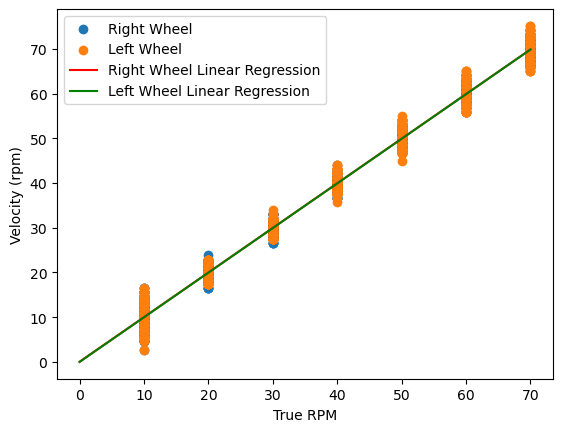

In [ ]:
# Fine Linear Regression

from sklearn.linear_model import LinearRegression

# Create the model for the right wheel
model_right = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['right_wheel_vel']

model_right.fit(X, y)

# Get the model parameters
right_slope = model_right.coef_
right_intercept = model_right.intercept_

# Create the model for the left wheel
model_left = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['left_wheel_vel']

model_left.fit(X, y)

# Get the model parameters
left_slope = model_left.coef_
left_intercept = model_left.intercept_


print(f'Right Wheel: Slope = {right_slope[0]:.2f}, Intercept = {right_intercept:.2f}')
print(f'Left Wheel: Slope = {left_slope[0]:.2f}, Intercept = {left_intercept:.2f}')


# Linear Regression function for the right wheel
def right_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Linear Regression function for the left wheel
def left_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Plot the linear regression
fig, ax = plt.subplots()
ax.scatter(base_df['rpm'], base_df['right_wheel_vel'], label='Right Wheel')
ax.scatter(base_df['rpm'], base_df['left_wheel_vel'], label='Left Wheel')
# Plot the linear regression
x = np.arange(0, 80, 10)
y = right_wheel_rpm(x, right_slope, right_intercept)
ax.plot(x, y, label='Right Wheel Linear Regression', color='r')
y = left_wheel_rpm(x, left_slope, left_intercept)
ax.plot(x, y, label='Left Wheel Linear Regression', color='g')
ax.legend()
plt.xlabel('True RPM')
plt.ylabel('Velocity (rpm)')
plt.show()


In [ ]:
# Get Inverse of the Linear Regression
def inverse_right_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope

def inverse_left_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope


# Test the inverse function
vel = 15
print(f'Right Wheel: RPM = {inverse_right_wheel_rpm(vel, right_slope[0], right_intercept):.2f}')
print(f'Left Wheel: RPM = {inverse_left_wheel_rpm(vel, left_slope[0], left_intercept):.2f}')

# Print slope and intercept
print(f'Right Wheel: Slope = {right_slope[0]:.6f}, Intercept = {right_intercept:.6f}')
print(f'Left Wheel: Slope = {left_slope[0]:.6f}, Intercept = {left_intercept:.6f}')


Right Wheel: RPM = 15.00
Left Wheel: RPM = 15.03
Right Wheel: Slope = 0.997269, Intercept = 0.044754
Left Wheel: Slope = 0.997609, Intercept = 0.007852


### compare wheel velocity in different environment 

In [ ]:
tarrpm = 10

### Air

Right Wheel mean: 9.89, Left Wheel mean: 9.88


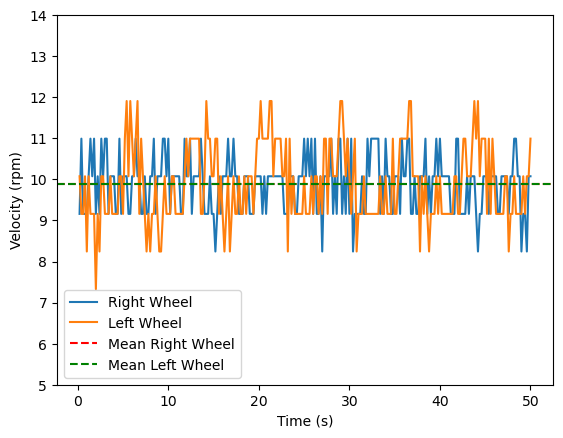

In [ ]:
df = pd.read_csv(f'/home/{file_direct}/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_0.csv')
# /home/prompt1203/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_10_id_0.csv
#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')


### Floor

Right Wheel mean: 9.76, Left Wheel mean: 9.82


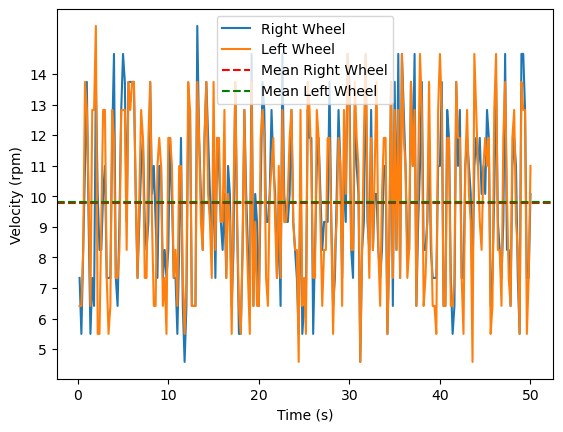

In [ ]:
df = pd.read_csv(f'/home/{file_direct}/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_1.csv')
# /home/prompt1203/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_10_id_0.csv
#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')


Right Wheel mean: 9.80, Left Wheel mean: 9.76


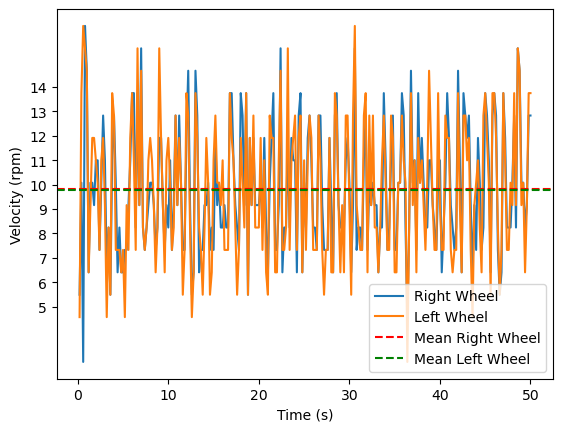

In [ ]:
df = pd.read_csv(f'/home/{file_direct}/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_2.csv')

#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')

## 2.การทดลองหาความสัมพันธ์ของค่าที่เกิดขึ้นกับหุ่นยนต์ และค่า Wheel Odometry 

ตัวแปรต้น: path การเดินของหุ่นยนต์ 

ตัวแปรตาม: Real_position ที่ได้จากการวัด, Wheel_position (Odom) ที่ได้จากการทำ Forward Kenematics 

ตัวแปรควบคุม: path การเดินของหุ่นยนต์ 

### สมมติฐาน  

ค่า Real_position ที่หุ่นยนต์เดินไปนั้นต้องมีค่า Standard Diviation น้อยเมื่อเทียบกับค่า Wheel_position (Odom) 

### ขั้นตอนการทดลอง 

สั่งให้หุ่นเดินตาม path สี่เหลียมและ pose ของหุ่นที่เกิดขึ้น เทียบกับ odom ที่ได้จาก คำนวณผ่าน Forward Kenematics โดยเก็บจาก Time stamped 

### สรุปผลการทดลอง 

In [ ]:
ex2_3_data_all_value = pd.DataFrame()
ex2_3_data_all_value_list = []

folder_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_control/experimentresult/experiment2'
file_name_format = 'Experiment_2_id_'

# Count the number of CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, f'{file_name_format}*.csv'))
num_csv_files = len(csv_files)
# print(csv_files)

for i in range(1, num_csv_files+1):
    csv_path = f'{folder_path}/{file_name_format}{i}.csv'
    ex2_data = pd.read_csv(csv_path, index_col=False)
    ex2_3_data_all_value_list.append(ex2_data.iloc[[-1]])

ex2_3_data_all_value = pd.concat(ex2_3_data_all_value_list, ignore_index=True)
ex2_3_data_all_value.head()

,time,wheel_odom_x,wheel_odom_y,odom_filter_x,odom_filter_y,true_x,true_y
0,20.200725,2.010064,0.004815,1.994200,-0.009196,2.02,0.0
1,20.201835,2.002676,0.011979,1.998723,0.019753,2.02,0.0
2,20.201112,2.006618,0.015747,1.987791,0.011144,2.02,0.0
3,20.201881,2.004398,-0.026071,1.999405,-0.036554,2.02,0.0
4,20.200556,2.014957,0.004623,2.008251,-0.029003,2.02,0.0


In [ ]:
wheel_odom = ex2_3_data_all_value.iloc[:-1,1:3]
wheel_odom
# real_value = {'real_x': [2.014, 2.01,2.014,2.015,2.009,2.013,2.004,2.012,1.998,2.009,2.016,2.017,2.02,2.012,2.016,2.016,2.019,2.016,2.024,2.01,2.017,], 'real_y': [3, 4]}
# df = pd.DataFrame(data=real_value)
# df

# print(wheel_odom)

,wheel_odom_x,wheel_odom_y
0,2.010064,0.004815
1,2.002676,0.011979
2,2.006618,0.015747
3,2.004398,-0.026071
4,2.014957,0.004623
5,2.004670,0.073078
6,2.003052,0.015895
7,2.017148,0.021290
8,2.000613,-0.003751
9,2.007989,-0.014418


## 3.การทดลองหาความสัมพันธ์ของ Cmd_Vel และการเคลื่อนที่ของหุ่นยนต์ 

ตัวแปรต้น: path, Cmd_vel 

ตัวแปรตาม: linear_velocity_real , linear_velocity_wheel_odom , angular_velocity_real , angular_velocity_wheel_odom 

ตัวแปรควบคุม: environment 

### สมมติฐาน 

เมื่อเปรียบเทียบ ค่า cmd_vel ที่สั่งกับค่า real value และ ค่า wheel odom แล้วค่า cmd vel มีค่ามากสุดและ real value และ wheel odom มีค่าใกล้เคียงกัน 

### ขั้นตอนการทดลอง 

วาง path เป็นเส้นตรงแล้วคำนวณความเร็วเชิงเส้นจากระยะที่หุ่นยนต์ทำได้เทียบกับเวลาที่ใช้ เทียบกับ cmd_vel และคำนวณความเร็วเชิงมุมจากการหมุน 90 องศา เทียบกับ cmd vel ภายในเวลา 10 วินาที 

### สรุปผลการทดลอง
จากการเก็บผลการทดลองที่ 2 สามารถนำผลการทดลองที่ 2 มาใช้ในการคำนวณความเร็วของหุ่นยนต์ เเละนำไปเปรียบเทียบกับ cmd_vel ที่สั่งหุ่นยนต์

In [ ]:
ex2_3_data_all_value

,time,wheel_odom_x,wheel_odom_y,odom_filter_x,odom_filter_y,true_x,true_y
0,20.200725,2.010064,0.004815,1.994200,-0.009196,2.02,0.0
1,20.201835,2.002676,0.011979,1.998723,0.019753,2.02,0.0
2,20.201112,2.006618,0.015747,1.987791,0.011144,2.02,0.0
3,20.201881,2.004398,-0.026071,1.999405,-0.036554,2.02,0.0
4,20.200556,2.014957,0.004623,2.008251,-0.029003,2.02,0.0
5,20.200945,2.004670,0.073078,2.003116,0.094025,2.02,0.0
6,20.200793,2.003052,0.015895,2.005403,-0.030811,2.02,0.0
7,20.201302,2.017148,0.021290,1.998207,0.008616,2.02,0.0
8,20.202005,2.000613,-0.003751,1.995176,-0.049875,2.02,0.0
9,20.201131,2.007989,-0.014418,1.997272,-0.073639,2.02,0.0


## 4.การทดลองปรับค่า Covariance ของ Wheel Odometry และ Imu 

ตัวแปรต้น: Covariance  

ตัวแปรตาม: Position 

ตัวแปรควบคุม: Path ที่ใช้ในการหา Covariance 

### สมมติฐาน  

การปรับจูนค่า Covariance ที่ได้จาก path การเดินของหุ่นยนต์ เมื่อทำการ track position จะได้ค่าที่แม่นยำมากขึ้น 

### ขั้นตอนการทดลอง  

ทำการหา covariance จาก path วงกลมและเส้นตรง และนำ covariance ที่ได้ไป test กับ Path เส้นตรง และสี่เหลี่ยม จากนั้นวัดผลเป็น pose ที่เกิดขึ้น 

### สรุปผลการทดลอง 

In [ ]:
ex4_data_cov_5_last = pd.DataFrame()
ex4_data_cov_25_last = pd.DataFrame()
ex4_data_cov_45_last = pd.DataFrame()

ex4_data_cov_5_list = []
ex4_data_cov_25_list = []
ex4_data_cov_45_list = []

cov_list = [0.005, 0.025, 0.045]

folder_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_control/experimentresult/experiment2'
file_name_format = f'Experiment_3_id_'

# Count the number of CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, f'{file_name_format}*.csv'))
num_csv_cov_files = len(csv_files)/3
# print(num_csv_cov_files)

for i in range(1, int(num_csv_cov_files)+1):
    # for j in range(0, len(cov_list)):
    csv_path_cov_5 = f'{folder_path}/{file_name_format}{i}_cov_0.005.csv'
    csv_path_cov_25 = f'{folder_path}/{file_name_format}{i}_cov_0.025.csv'
    csv_path_cov_45 = f'{folder_path}/{file_name_format}{i}_cov_0.045.csv'
    
    ex4_data_cov_5 = pd.read_csv(csv_path_cov_5, index_col=False)
    ex4_data_cov_25 = pd.read_csv(csv_path_cov_25, index_col=False)
    ex4_data_cov_45 = pd.read_csv(csv_path_cov_45, index_col=False)

    ex4_data_cov_5_list.append(ex4_data_cov_5.iloc[[-1]])
    ex4_data_cov_25_list.append(ex4_data_cov_25.iloc[[-1]])
    ex4_data_cov_45_list.append(ex4_data_cov_45.iloc[[-1]])

    ex4_data_cov_5_last = pd.concat(ex4_data_cov_5_list, ignore_index=True)
    ex4_data_cov_25_last = pd.concat(ex4_data_cov_25_list, ignore_index=True)
    ex4_data_cov_45_last = pd.concat(ex4_data_cov_45_list, ignore_index=True)


# ex4_data_cov_5_last.head()
# ex4_data_cov_25_last.head()
ex4_data_cov_45_last.head()


,time,wheel_odom_x,wheel_odom_y,odom_filter_x,odom_filter_y,true_x,true_y
0,20.201311,2.012090,-0.007366,2.002810,0.072562,2.02,0.0
1,20.201064,2.009026,-0.009824,1.995806,-0.081922,2.02,0.0
2,20.201310,2.011512,0.006104,1.998611,0.004238,2.02,0.0
3,20.200880,2.008562,0.021594,2.014192,-0.019863,2.02,0.0
4,20.201296,2.011728,0.032457,2.003609,0.048057,2.02,0.0


## 5.การทดลองเคลื่อนที่ 

- การเคลื่อนที่ผ่าน Via point 

- การเคลื่อนที่เป็นวงกลม 

ตัวแปรต้น: Via points 

ตัวแปรตาม: เส้นทางการเดินจริงของหุ่นยนต์ 

ตัวแปรควบคุม: Path การเดินของหุ่นยนต์ 

### สมมติฐาน 

หุ่นยนต์สามารคลื่อนที่ตาม Via points และกลับมาที่จุดเริ่มต้นได้ โดยมี pose ที่ใกล้เคียงกับค่าที่สั่ง 

### ขั้นตอนการทดลอง 

ทำการตั้งกล้องเพื่อ Track การเดินของหุ่นยนต์ จากนั้นสั่งหุ่นยนต์ให้เดินตาม path via points และ path วงกลมที่กำหนด และเก็บค่า Odom ที่ผ่าน EKF จากนันนำค่าทั้ง 3 มาเปรียบเทียบกัน 

### สรุปผลการทดลอง 